<a href="https://colab.research.google.com/github/Abhoycodes/CodSoft_Internship/blob/main/Codsoft_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Task 2:Movie Rating Prediction Using Python**

Author : Abhoy Biswas.

Batch - MAY BATCH A52



---



1.Importing Libraries

2.Loading Dataset

3.Understanding dataset

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [239]:
data= pd.read_csv('/content/IMDb Movies India.csv',encoding='latin1')

In [240]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [242]:
data.shape

(15509, 10)

 **Data Exploration**
 1. Finding the unique values .
 2. Finding and removing duplicate values .

In [243]:
print('Unique Years\n',data.Year.unique())

Unique Years
 [nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1917)' '(1913)' '(1930)' '(1926)' '(1914)' '(1924)']


In [244]:
print('Unique Dutations in mins:',"\n",data.Duration.unique(),"\n")

Unique Dutations in mins: 
 [nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min' '96 min' '120 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min' '168 min' '158 min'
 '126 min' '94 min' '138 min' '124 min' '144 min' '157 min' '136 min'
 '107 min' '113 min' '80 min' '122 min' '149 min' '148 min' '130 min'
 '121 min' '188 min' '115 min' '103 min' '114 min' '170 min' '100 min'
 '99 min' '140 min' '128 min' '93 min' '125 min' '145 min' '75 min'
 '111 min' '134 min' '85 min' '104 min' '92 min' '137 min' '127 min'
 '150 min' '119 min' '135 min' '86 min' '76 min' '70 min' '72 min'
 '151 min' '95 min' '52 min' '89 min' '143 min' '177 min' '117 min'
 '123 min' '154 min' '88 min' '175 min' '153 min' '78 min' '139 min'
 '133 min' '101 min' '180 min' '60 min' '46 min' '164 min' '162 min'
 '171 min' '160 min' '152 min' '62 min' '163 min' '165 min' '141 min'
 '210 min' '129 min' '156 min' '240 min' '172 min' '155 min' '118 min'

In [245]:
print("groupby(['Genre']':","\n",data.groupby(['Genre']).count(),"\n")

groupby(['Genre']': 
                               Name  Year  Duration  Rating  Votes  Director  \
Genre                                                                         
Action                        1289  1265       262     417    417      1249   
Action, Adventure               41    41        17      24     24        41   
Action, Adventure, Biography     1     1         1       1      1         1   
Action, Adventure, Comedy       42    41        37      40     40        42   
Action, Adventure, Crime        19    19        11      16     16        19   
...                            ...   ...       ...     ...    ...       ...   
Thriller, Action                 2     2         1       1      1         2   
Thriller, Musical, Mystery       1     1         1       1      1         1   
Thriller, Mystery                3     3         2       3      3         3   
Thriller, Mystery, Family        1     1         1       1      1         1   
War                           

In [246]:
print("value_counts:","\n",data["Director"].value_counts().head(),"\n")

value_counts: 
 Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
Name: count, dtype: int64 



In [247]:
data.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [248]:
data.duplicated().sum()

6

In [249]:

# drop the duplicated rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

Data Cleaning And Data Processing .
1. Movie name is not scientifically needed ,Dropping statistically insignificant columns
2. Filling missing Values: Rating, Votes has many missing values.As per IMDB structure, final rating is determined by aggregated value of votes.
3. Convert Year,Votes to int

In [250]:

data['Year'] = data['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(float).astype('Int64')
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(r' min', '', regex=True), errors='coerce')
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')

# Handle missing values
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
data.dropna(subset=['Year', 'Genre'], inplace=True)
data.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)



# Replacing null values in 'Rating', 'Duration', and 'Votes' columns
data['Rating'].fillna(data['Rating'].mode().iloc[0], inplace=True)
data['Duration'].fillna(data['Duration'].mean(), inplace=True)
data['Votes'].fillna(data['Votes'].median(), inplace=True)


# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

In [252]:
#Checking Null Values again for confirmation.
print('Null Values in Year Column',data['Year'].isnull().sum())
print('Null Values in Genre Column',data['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [ ]:
data

**Data Visualization**

1.Top Ten (All over the time )


In [253]:
def TopTenPlot(column):
    global data
    data[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()







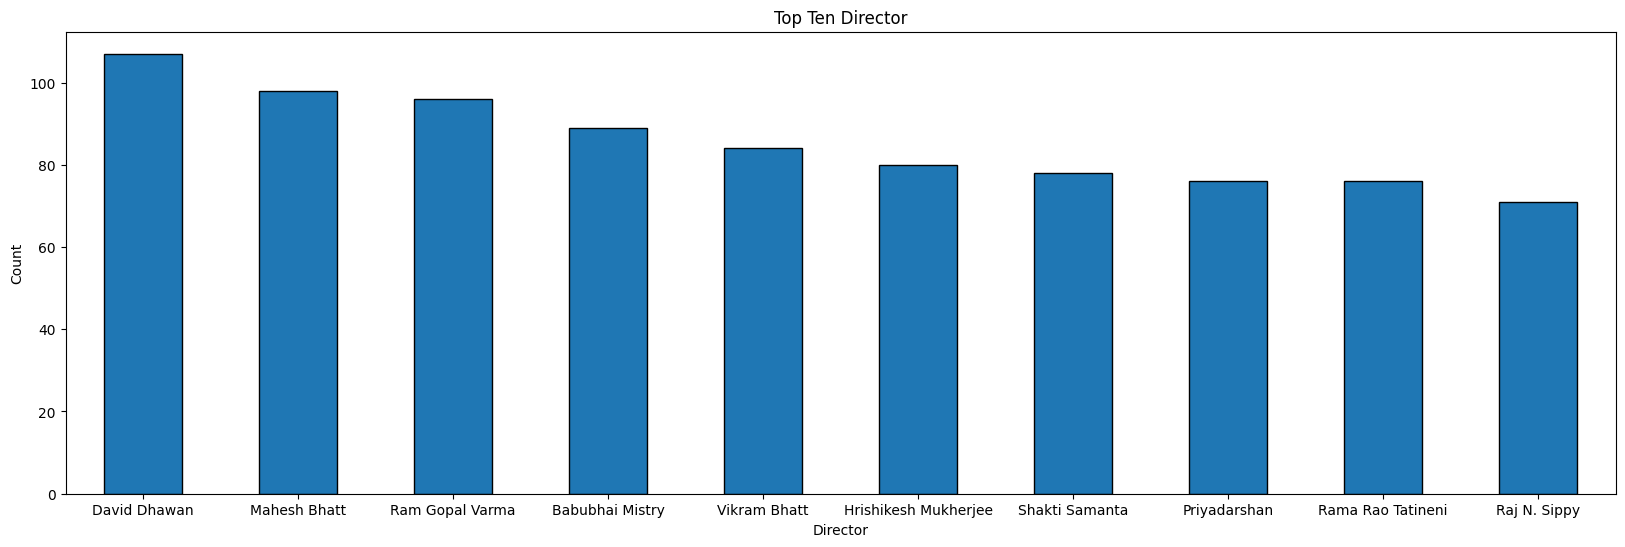

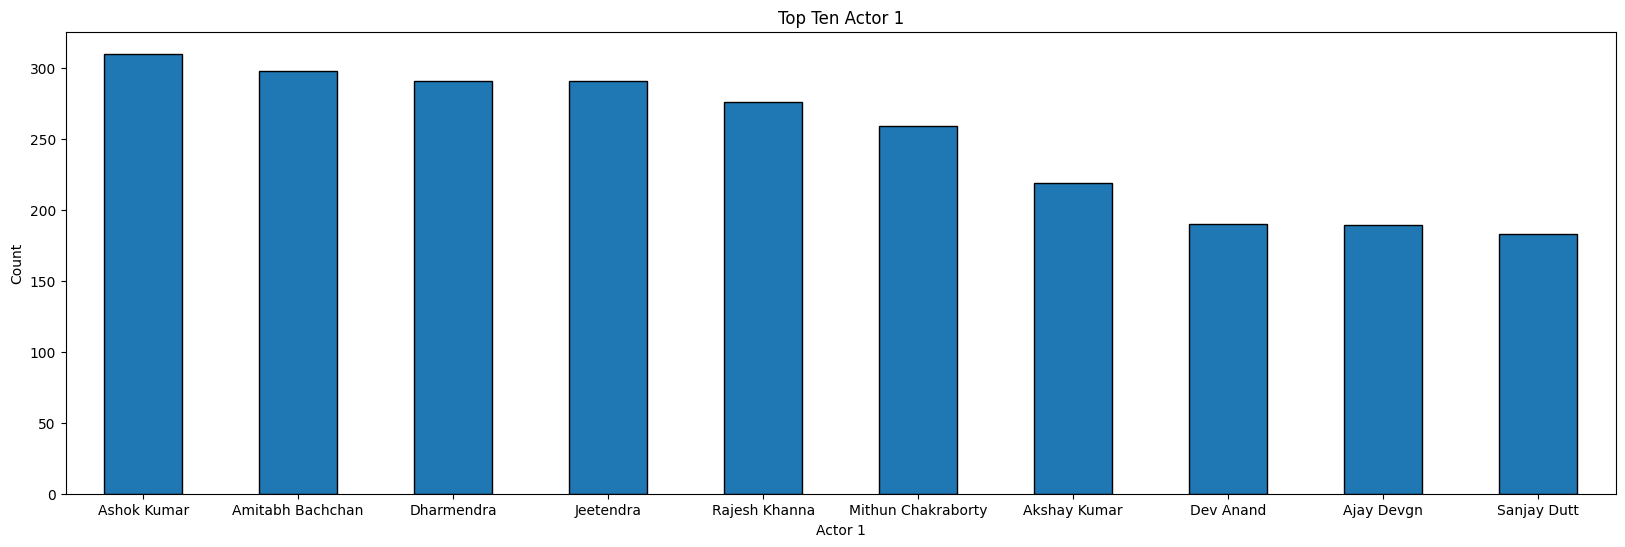

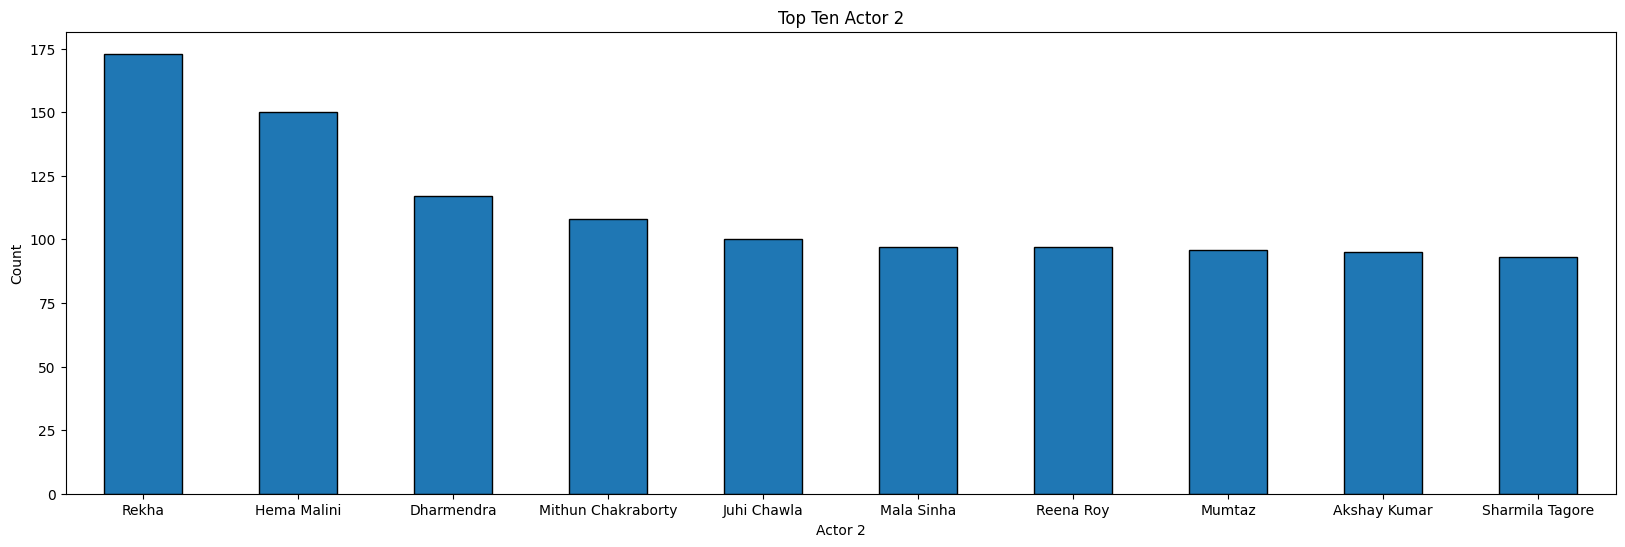

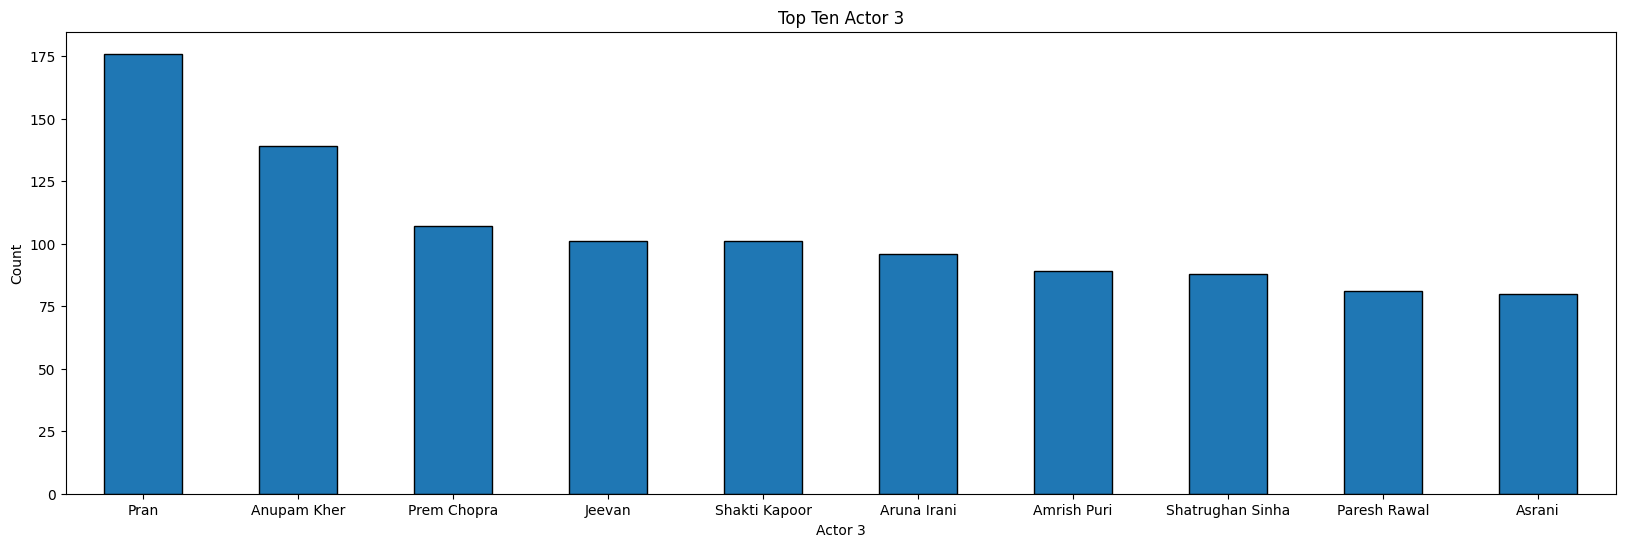

In [254]:
TopTenPlot("Director")
TopTenPlot("Actor 1")
TopTenPlot("Actor 2")
TopTenPlot("Actor 3")


In [255]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create histogram plot using Plotly Express
fig_year = px.histogram(data, x='Year', histnorm='probability density', nbins=30, color_discrete_sequence=colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(
    title='Distribution of Year',
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    bargap=0.02,
    plot_bgcolor='white'
)


In [256]:
# Group data by Year and calculate the average rating
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Ratings Earned  Vs Movie Year plot : Year of Movie producton  most Loved  ', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Movie Production Year', yaxis_title='Ratings Gained ', xaxis=dict(showgrid=True), yaxis=dict(showgrid=True), plot_bgcolor = 'white')
fig.show()

In [257]:

dur_rat = px.scatter(data, x='Duration', y='Rating', trendline='ols', color='Rating', color_continuous_scale='darkmint')


dur_rat.update_layout(
    title='How does length of movie have any impact on rating?',
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Duration of Movie in Minutes',
    yaxis_title='Rating of a movie',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white'
)


dur_rat.show()


In [258]:



fig_dur_votes = px.scatter(data, x = 'Duration', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_dur_votes.update_layout(title='Does length of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_votes.show()

**Data Processing**

```
Dropping non essential columns
```



In [259]:
data.drop('Name', axis = 1, inplace = True)

In [260]:
data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109.000000,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2021,90.000000,Drama,6.8,95.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,2021,90.000000,Musical,6.8,95.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,110.000000,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2019,110.000000,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
...,...,...,...,...,...,...,...,...,...
21008,1988,134.105505,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
21009,1999,129.000000,Action,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
21010,1999,129.000000,Drama,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
21011,1998,130.000000,Action,6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [261]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

In [262]:
data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,109.000000,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.261929,7.000000,6.850000,7.000000,7.000000
1,2021,90.000000,Drama,6.8,95.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.261929,6.800000,6.900000,7.075000,6.800000
2,2021,90.000000,Musical,6.8,95.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.230254,6.800000,6.900000,7.075000,6.800000
3,2019,110.000000,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.886752,4.400000,5.250000,4.400000,4.460000
4,2019,110.000000,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.950251,4.400000,5.250000,4.400000,4.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21008,1988,134.105505,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.794511,3.970000,6.072549,3.400000,4.600000
21009,1999,129.000000,Action,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.794511,5.175000,5.478082,4.613333,5.815625
21010,1999,129.000000,Drama,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,6.261929,5.175000,5.478082,4.613333,5.815625
21011,1998,130.000000,Action,6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.794511,4.223684,5.858076,5.602500,5.587500


In [263]:
# Keeping the predictor and target variable

X = data[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
Y = data['Rating']
# Splitting the dataset into training and testing parts

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

Training the dataset with Random Forest Regresson Model

In [264]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
rf_pred =rf.predict(X_test)

In [265]:
print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(Y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(Y_test, rf_pred))
print('R2 score: ',r2_score(Y_test, rf_pred))

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.10893209850107069
Mean absolute error:  0.1709497977635109
R2 score:  0.9305344805582151


**Upcoming Movie Success Prediction**.

*Live input data*.

In [266]:

user_input = {
    'Year': 2024,
    'Votes': 1000,
    'Duration': 120,
    'Genre_mean_rating': 6.5,
    'Director_encoded': 7.2,
    'Actor1_encoded': 5.478082,
    'Actor2_encoded': 4.613333,
    'Actor3_encoded': 6.6
}


user_data = pd.DataFrame(user_input, index=[0])


In [267]:
X_train_columns = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']
user_data = user_data[X_train_columns]

In [268]:
predictions = rf.predict(user_data)
print('Predicted rating:', predictions[0])

Predicted rating: 6.041999999999999
